In [4]:
#! /usr/bin/env python
# Test photometry
# Simple plots eg. colour-colour
# Match and compare deep data to wide, per galaxy

from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
import h5py as h
from astropy.table import Table,join

In [7]:
#read in Erin's catalogue
cosmosfile='/global/cscratch1/sd/aamon/deepfields/run-fmof-dv02.fits'

data = fits.open(cosmosfile) 
data.info() 
print(data.info)
deep=Table(data[1].data)
print(min(deep['ra']),max(deep['ra']))

cols = data[1].columns
print(cols)

print(deep['bdf_mag']) #ugriz YJHKs
print(len(deep['mag_auto']))

deepra=deep['ra']
deepdec=deep['dec']

Filename: /global/cscratch1/sd/aamon/deepfields/run-fmof-dv02.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  model_fits    1 BinTableHDU     63   347296R x 26C   [K, D, D, E, E, K, J, 11A, E, 2D, D, 9J, 9D, 9D, 9D, 9D, J, J, D, 9D, 9D, 81D, 9D, 9D, 81D, 9D]   
  2  epochs_data    1 BinTableHDU     17   2993157R x 4C   [K, I, J, 18D]   
<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2aaadcfe6750>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaadcf7a810>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaadcfc8410>]>
149.435126896 150.793280273
ColDefs(
    name = 'id'; format = 'K'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flux_auto'; format = 'E'
    name = 'mag_auto'; format = 'E'
    name = 'fof_id'; format = 'K'
    name = 'flags'; format = 'J'
    name = 'flagstr'; format = '11A'
    name = 'masked_frac'; format = 'E'
    name = 'p

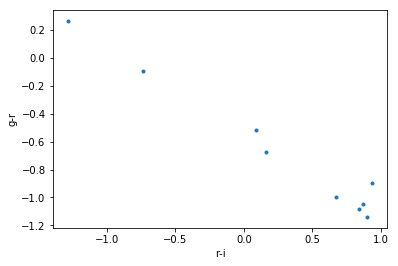

In [12]:
#colour-colour
plt.scatter(deep['bdf_mag'][2]-deep['bdf_mag'][3],deep['bdf_mag'][1]-deep['bdf_mag'][2], marker='.') #,markersize=10 )
plt.xlabel('r-i')
plt.ylabel('g-r')

In [14]:
#size-mag
plt.scatter(deep['bdf_mag'][3],SIZE,  marker='.') #,markersize=10 )
plt.xlabel('mag')
plt.ylabel('SIZE')

NameError: name 'SIZE' is not defined

In [ ]:
#read in gold 
catname = '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5'

f = h.File(catname,'r')
print(f['catalog'].keys())
print(f['catalog/gold'].keys())

#FLAGS_GOLD  If you are using SExtractor quantities, you should add (FLAGS_GOLD & 1111000) = 0; and (FLAGS_BADREGIONS & 01) = 0

gflag = np.array(f['catalog/gold/flags_gold'])
print(gflag)

ra = np.array(f['catalog/gold/ra'])#[star_mask] 
dec = np.array(f['catalog/gold/dec'])#[star_mask]
print(len(ra))

#cosmos only
ra=ra[(ra<151)] # & (ra>149)]
#dec=dec[cosmosonly]
print(len(ra))
ra=ra[(ra>149)]
print(len(ra))

zeropt=30
r = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_r']))#[star_mask]
i = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_i']))#[star_mask]
z = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_z']))#[star_mask]

print(len(r))

"""cosmosonly=np.where(  (ra<max(deep['ra'])) & (ra>min(deep['ra']))
               &  (dec<max(deep['dec'])) & (dec>min(deep['dec']))   )
i=i[cosmosonly]
z=z[cosmosonly]
r=r[cosmosonly]
print(len(r))"""
print(min(ra)) 
print(max(ra))
ra=ra[np.where((i<30) & (i>0))]
dec=dec[np.where((i<30)& (i>0))]
z=z[np.where((i<30)& (i>0))]
r=r[np.where((i<30)& (i>0))]
i=i[np.where((i<30)& (i>0))]
print(len(ra))

ra[ra > 180] -= 360

gold=np.column_stack((ra,dec,r,i,z))
print(gold)
#gold = gold[gold[:,0].argsort()][:1000000]
print(gold)
print(len(gold))
goldra=gold[:,0]
golddec=gold[:,1]
goldr=gold[:,2]
goldi=gold[:,3]
goldz=gold[:,4]


[u'metacal', u'gold', u'bpz', u'dnf', u'redmagic', u'redmapper']
[u'a_sed_sfd98_g', u'a_sed_sfd98_i', u'a_sed_sfd98_r', u'a_sed_sfd98_z', u'coadd_object_id', u'dec', u'delta_mag_chrom_g', u'delta_mag_chrom_i', u'delta_mag_chrom_r', u'delta_mag_chrom_z', u'delta_mag_y4_g', u'delta_mag_y4_i', u'delta_mag_y4_r', u'delta_mag_y4_z', u'ebv_sfd98', u'flags', u'flags_badregions', u'flags_footprint', u'flags_foreground', u'flags_gold', u'flags_phot', u'hpix_16384', u'n_images_g', u'n_images_i', u'n_images_r', u'n_images_z', u'ra', u'sextractor_flags_g', u'sextractor_flags_i', u'sextractor_flags_r', u'sextractor_flags_z', u'sof_cm_flux_corrected_g', u'sof_cm_flux_corrected_i', u'sof_cm_flux_corrected_r', u'sof_cm_flux_corrected_z', u'sof_cm_flux_err_g', u'sof_cm_flux_err_i', u'sof_cm_flux_err_r', u'sof_cm_flux_err_z', u'sof_cm_mag_corrected_g', u'sof_cm_mag_corrected_i', u'sof_cm_mag_corrected_r', u'sof_cm_mag_corrected_z', u'sof_cm_mag_err_g', u'sof_cm_mag_err_i', u'sof_cm_mag_err_r', u'sof_cm_

/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


In [ ]:
#match galaxies by ra and dec

from astropy.coordinates import SkyCoord
from astropy import units as u

goldcat = SkyCoord(ra=goldra*u.degree, dec=golddec*u.degree)  
catalog = SkyCoord(ra=rastarcat*u.degree, dec=decstarcat*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(goldcat, nthneighbor=1) 

print(goldra[idx])

print(rastarcat)

In [ ]:
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50, range=(0, 20)) #, normed=1, alpha=0.75)
plt.xlabel('d2d (arcsec)')

In [ ]:
plt.scatter(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)],rastarcat[np.where(d2d < matchlim)], marker='.')
plt.xlabel('Reserve Stars RA-GOLD RA')
plt.ylabel('Reserve Stars RA')
plt.ticklabel_format(useOffset=False)
#plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(rastarcat[np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]) )
plt.xlim(min(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)]) )
print(min(goldra[idx]),max(goldra[idx]) )
print(min(rastarcat),max(rastarcat))

In [ ]:
#plot magnitudes
fit = np.polyfit(goldr[idx][np.where(d2d < matchlim)], data['mag'][np.where(d2d < matchlim)], 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(goldr[idx][np.where(d2d < matchlim)], fit_fn(goldr[idx][np.where(d2d < matchlim)]), '--k')

plt.scatter(goldr[idx][np.where(d2d < matchlim)], data['mag'][np.where(d2d < matchlim)], marker='.')
plt.xlabel('GOLD r')
plt.ylabel('Reserve Stars r')